In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
df = pd.read_csv('reliance_data.csv')

In [20]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [21]:
df.columns= df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('%','')

In [22]:
df.head()

,Date,Symbol,Series,Prev_Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable_Volume,Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6205 non-null   object 
 1   Symbol              6205 non-null   object 
 2   Series              6205 non-null   object 
 3   Prev_Close          6205 non-null   float64
 4   Open                6205 non-null   float64
 5   High                6205 non-null   float64
 6   Low                 6205 non-null   float64
 7   Last                5657 non-null   float64
 8   Close               6205 non-null   float64
 9   VWAP                6205 non-null   float64
 10  Volume              6205 non-null   int64  
 11  Turnover            6205 non-null   float64
 12  Trades              2356 non-null   float64
 13  Deliverable_Volume  4693 non-null   float64
 14  Deliverble          4693 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 727.3

In [25]:
df.describe()

,Prev_Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable_Volume,Deliverble
count,6205.000000,6205.000000,6205.000000,6205.000000,5657.000000,6205.000000,6205.000000,6.205000e+03,6.205000e+03,2.356000e+03,4.693000e+03,4693.000000
mean,864.978445,866.381176,878.763811,852.795649,925.596986,865.291289,865.851146,6.215219e+06,5.187662e+14,1.383690e+05,2.239901e+06,0.436332
std,588.711275,590.165211,599.625939,578.473998,581.604138,588.763023,588.941488,5.479271e+06,7.539147e+14,1.260736e+05,1.861021e+06,0.145526
min,0.000000,102.600000,105.600000,99.600000,101.600000,101.300000,101.840000,5.282000e+04,3.480000e+12,2.991000e+03,2.909700e+04,0.076300
25%,335.200000,335.000000,340.700000,329.500000,437.550000,335.350000,335.710000,3.021751e+06,1.840000e+14,7.119900e+04,1.178486e+06,0.323000
50%,850.650000,852.500000,862.000000,842.100000,892.350000,850.700000,851.680000,4.602904e+06,3.270000e+14,9.841550e+04,1.784092e+06,0.452300
75%,1089.400000,1091.100000,1107.000000,1073.950000,1129.900000,1089.850000,1089.480000,7.304408e+06,5.730000e+14,1.559778e+05,2.685974e+06,0.546300
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473430e+16,1.428490e+06,3.495888e+07,0.978300


In [26]:
df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev_Close               0
Open                     0
High                     0
Low                      0
Last                   548
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                3849
Deliverable_Volume    1512
Deliverble            1512
dtype: int64

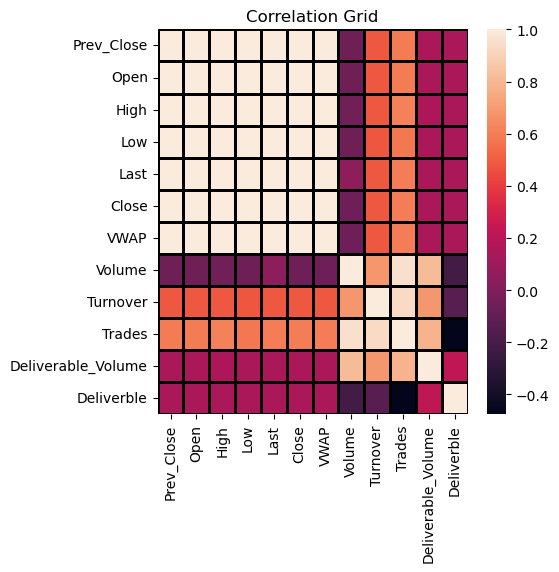

In [36]:
corr = df.drop(columns=['Date','Symbol','Series']).corr()
plt.figure(figsize=(5,5))
sns.heatmap(data=corr,linewidths=2,cbar=True,linecolor='Black')
plt.title('Correlation Grid')
plt.show()

In [37]:
col = ['Prev_Close','Open','High','Low','Close','Volume']

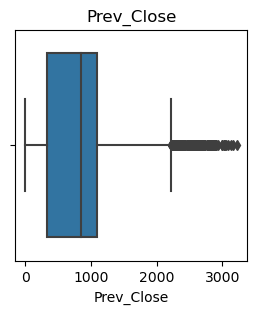

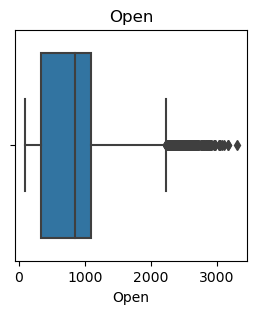

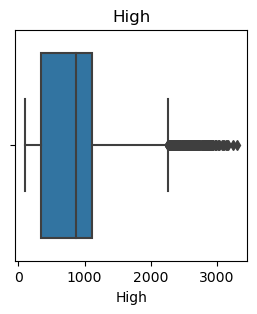

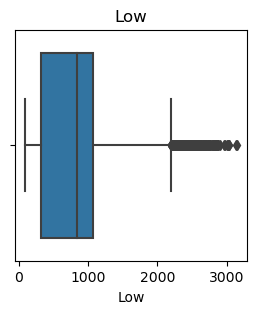

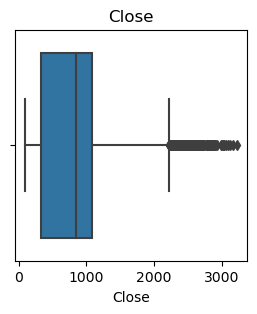

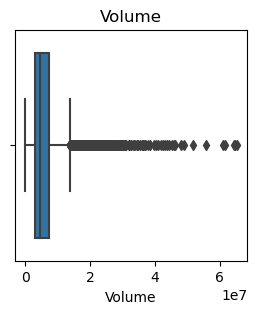

In [48]:
for i in col:
    plt.figure(figsize=(3,3))
    sns.boxplot(x=i,data=df)
    plt.title(i)
    plt.show()


In [49]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev_Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable_Volume',
       'Deliverble'],
      dtype='object')

In [52]:
df.drop(columns=['Date', 'Symbol', 'Series','Last', 'Trades', 'Deliverable_Volume',
       'Deliverble', 'Close'])

,Prev_Close,Open,High,Low,VWAP,Volume,Turnover
0,204.65,205.00,206.10,203.65,205.26,3717450,7.630000e+13
1,205.75,205.25,206.25,202.65,204.13,6024650,1.230000e+14
2,204.15,207.50,216.95,205.25,207.04,7473500,1.550000e+14
3,205.70,203.75,204.40,201.05,202.47,7744000,1.570000e+14
4,203.80,203.00,203.00,200.65,202.05,5952000,1.200000e+14
...,...,...,...,...,...,...,...
6200,1899.50,1951.00,1970.00,1926.25,1952.18,20918665,4.083700e+15
6201,1950.70,1964.00,1974.00,1932.00,1952.11,14277083,2.787040e+15
6202,1964.05,1980.00,1992.95,1942.20,1969.06,15062376,2.965870e+15
6203,1947.80,1953.05,1965.00,1930.05,1946.67,11924527,2.321310e+15


In [57]:
x = df.drop(columns=['Date', 'Symbol', 'Series','Last', 'Trades', 'Deliverable_Volume',
       'Deliverble','Turnover','Close'])

In [58]:
y = df.Close

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2023)

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()

In [62]:
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [63]:
lr=LinearRegression()

In [65]:
lr.fit(x_train_std,y_train)

LinearRegression()

In [66]:
y_pred=lr.predict(x_test_std)

In [69]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",mean_squared_error(y_test,y_pred,squared=False))
print("MAE: ",mean_absolute_error(y_test,y_pred))

R2 Score:  0.9997660044526839
MSE:  85.73368674554055
RMSE:  9.259248713882814
MAE:  4.8447079305123015
